In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [49]:
df = pd.read_csv("/content/titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [52]:
mv = df.isnull().sum()
mv

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [53]:
data_no_mv = df.dropna(axis=0)
data_no_mv.describe(include='all')

,Survived,Pclass,Sex,Age,Fare
count,714.000000,714.000000,714,714.000000,714.000000
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,male,NaN,NaN
freq,NaN,NaN,453,NaN,NaN
mean,0.406162,2.236695,NaN,29.699118,34.694514
std,0.491460,0.838250,NaN,14.526497,52.918930
min,0.000000,1.000000,NaN,0.420000,0.000000
25%,0.000000,1.000000,NaN,20.125000,8.050000
50%,0.000000,2.000000,NaN,28.000000,15.741700
75%,1.000000,3.000000,NaN,38.000000,33.375000


In [54]:
data_with_dummies = pd.get_dummies(data_no_mv, drop_first=True)
data_with_dummies.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,True
1,1,1,38.0,71.2833,False
2,1,3,26.0,7.9250,False
3,1,1,35.0,53.1000,False
4,0,3,35.0,8.0500,True


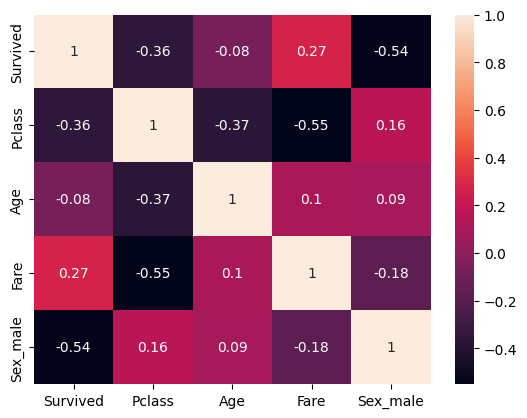

In [55]:
corr_matrix = data_with_dummies.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # Set annot = True to print the values inside the squares
plt.show()

<ipython-input-57-4cd01cf7b721>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_multicollinearity['Age'])


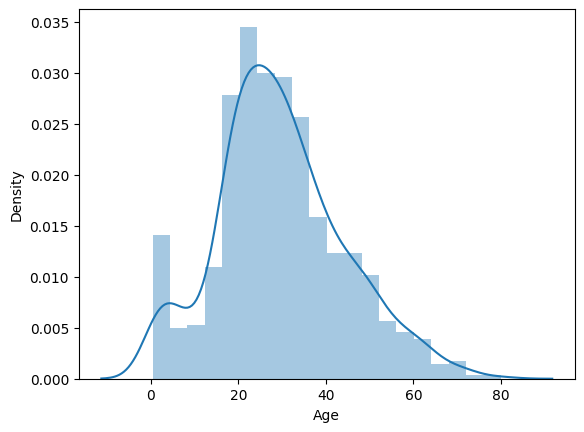

In [57]:
sns.distplot(data_no_multicollinearity['Age'])
plt.show()

In [58]:
features = data_no_multicollinearity.drop('Survived', axis=1)
label = data_no_multicollinearity['Survived']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [60]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [61]:
pred = clf.predict(X_test)

In [62]:
acc = accuracy_score(y_test, pred)
acc

0.7692307692307693

In [63]:
matrix = pd.DataFrame(
        confusion_matrix(y_test, pred),
        columns=['Predicted 0', 'Predicted 1'],
        index=['Actual 0', 'Actual 1'])
matrix

,Predicted 0,Predicted 1
Actual 0,74,12
Actual 1,21,36


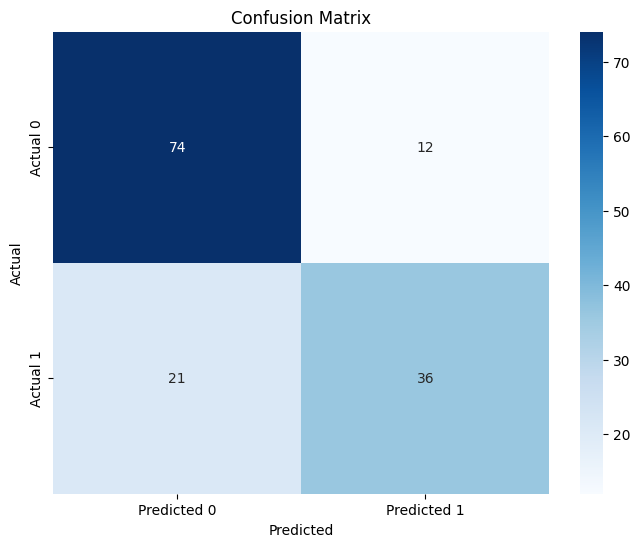

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()